**IMPORT ALL NECESSARY LIBRARIES**

# New Section

In [42]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline
# It sets the backend of matplotlib to the 'inline' backend:
import plotly.express as px
import time # calculate time

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
#from selenium import webdriver # use for automation chrome # This line should now work
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model

import warnings # ignores pink warnings
warnings.filterwarnings('ignore')

dataset was downloaded from phishtank !wget http://data.phishtank.com/data/online-valid.csv, from this set  11.5k URLs were randomly sleected. And was accessed in realtime to capture various features like google index, page index,length of url,who is the registrar etc.

**LOAD DATASET, you need to copy the file phising_site_csv to colab folder**

In [43]:
# Loading the dataset
phish_data = pd.read_csv('dataset_phishing.csv')

**CHECK THE DATA in the dataset - BELOW COMMAND WILL LIST FIRST 5 DATA**

In [44]:
phish_data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


**AGAIN CHECK THE DATA, BELOW CODE DISPLAY LAST 5 FROM THE DATASET**

In [45]:
phish_data.tail()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate
11429,http://174.139.46.123/ap/signin?openid.pape.ma...,477,14,1,24,0,1,1,9,0,...,1,1,1,0,-1,0,1,1,0,phishing


**CHECK THE DATASET INFORMATION LIKE TOTAL NUMBER OF DATA **

In [46]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

**compare how many data to make sure enough good and bad websites are selected. In our model use use equal number of good and bad websites**

In [47]:
# Get the value counts for the 'status' column
status_counts = phish_data['status'].value_counts()

# Print the counts for 'legitimate' and 'phishing'
print(f"Legitimate count: {status_counts.get('legitimate', 0)}")  # 0 if 'legitimate' is not found
print(f"Phishing count: {status_counts.get('phishing', 0)}")  # 0 if 'phishing' is not found

Legitimate count: 5715
Phishing count: 5715


**CHECK IF DATASET HAS ANY NULL VALUES**

In [8]:
phish_data.isnull().sum() # there is no missing values

,0
url,0
length_url,0
length_hostname,0
ip,0
nb_dots,0
...,...
web_traffic,0
dns_record,0
google_index,0
page_rank,0


**STRUCTURIZE THE DATA--into two dimensional**

In [9]:
#create a dataframe of classes counts
# Check if 'status' is the correct column name
label_counts = pd.DataFrame(phish_data['status'].value_counts())
label_counts = label_counts.rename(columns={label_counts.columns[0]: 'status'})

In [10]:
#create a dataframe of classes counts
status_counts = pd.DataFrame(phish_data.status.value_counts())
status_counts = status_counts.rename(columns={status_counts.columns[0]: 'status'})


In [11]:
#Check the content again and see the status colum has now changed to Binary values. 0 -Legitimate and 1 for Phishing.
phish_data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [12]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')#to getting alpha only

**LETS SEE HOW IT TOKENIZE< BY ASKING TO TOKENIZE FIRST URL IN DATASET**

In [13]:
phish_data.url[0]

'http://www.crestonwood.com/router.php'

**Below is the combination of TOKEN for first URL in thedataset**

In [14]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.url[0]) # using first row

['http', 'www', 'crestonwood', 'com', 'router', 'php']

In [15]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.url.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 0.19903779899959773 sec


In [16]:
phish_data.sample(5)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,text_tokenized
1611,http://magic.wizards.com/en/content/commander-...,52,17,0,2,1,0,0,0,0,...,1,0,409,10182,2931,0,0,5,legitimate,"[http, magic, wizards, com, en, content, comma..."
11342,https://openmodelica.org/,25,16,0,1,0,0,0,0,0,...,1,0,289,5554,926922,0,0,4,legitimate,"[https, openmodelica, org]"
6262,http://kecmanijada.com/wp-includes/theme-compa...,69,15,0,2,2,0,0,0,0,...,1,0,307,1884,0,0,1,0,phishing,"[http, kecmanijada, com, wp, includes, theme, ..."
5725,http://www.Cisco.com/c/en/us/support/docs/ip/b...,86,13,0,3,4,0,0,0,0,...,0,1,659,12126,1001,0,0,7,legitimate,"[http, www, Cisco, com, c, en, us, support, do..."
338,https://zmail221.appspot.com,28,20,0,2,0,0,0,0,0,...,0,0,230,5614,0,0,1,5,phishing,"[https, zmail, appspot, com]"


In [17]:
stemmer = SnowballStemmer("english") # choose a language

In [18]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 1.7200511000000915 sec


In [19]:
phish_data.sample(5)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,text_tokenized,text_stemmed
8367,http://heroes-fansubs.blogspot.com,34,27,0,2,1,0,0,0,0,...,0,373,7296,10475848,0,0,5,legitimate,"[http, heroes, fansubs, blogspot, com]","[http, hero, fansub, blogspot, com]"
5175,http://www.dafont.com/computerfont.font,39,14,0,3,0,0,0,0,0,...,0,2638,7222,726,0,0,6,legitimate,"[http, www, dafont, com, computerfont, font]","[http, www, dafont, com, computerfont, font]"
4607,http://fluidaccountants.co.uk/essen/pg/pge/Pro...,51,22,0,2,0,0,0,0,0,...,0,356,1105,0,0,1,0,phishing,"[http, fluidaccountants, co, uk, essen, pg, pg...","[http, fluidaccount, co, uk, essen, pg, pge, p..."
10260,https://tabs.ultimate-guitar.com/s/sex_pistols...,73,24,0,3,1,0,0,0,0,...,0,3002,7590,635,0,1,5,legitimate,"[https, tabs, ultimate, guitar, com, s, sex, p...","[https, tab, ultim, guitar, com, s, sex, pisto..."
647,https://www.secureupdate.appleld.com.duilawyer...,124,46,1,5,0,0,1,2,0,...,0,25,3993,5707171,0,1,0,phishing,"[https, www, secureupdate, appleld, com, duila...","[https, www, secureupd, appleld, com, duilawye..."


**Join all the stemmed words into a single text for each URLs.**

In [20]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.012505712999882235 sec


In [21]:
phish_data.sample(5)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,text_tokenized,text_stemmed,text_sent
3685,http://attention.solution.valid.clearpointsupp...,84,47,0,4,0,0,0,0,0,...,358,1834,0,0,1,0,phishing,"[http, attention, solution, valid, clearpoints...","[http, attent, solut, valid, clearpointsuppli,...",http attent solut valid clearpointsuppli com k...
6874,http://ch.prunauneau.fr/3/,26,16,0,2,0,0,0,0,0,...,277,2644,0,0,1,1,phishing,"[http, ch, prunauneau, fr]","[http, ch, prunauneau, fr]",http ch prunauneau fr
3823,http://vimall.ru/,17,9,0,1,0,0,0,0,0,...,142,954,334510,0,0,2,legitimate,"[http, vimall, ru]","[http, vimal, ru]",http vimal ru
764,http://www.cel.ro/,18,10,0,2,0,0,0,0,0,...,40,5834,22855,0,0,4,legitimate,"[http, www, cel, ro]","[http, www, cel, ro]",http www cel ro
9839,http://www.softpedia.com/get/System/File-Manag...,76,17,0,3,3,0,0,0,0,...,698,6242,2409,0,0,6,legitimate,"[http, www, softpedia, com, get, System, File,...","[http, www, softpedia, com, get, system, file,...",http www softpedia com get system file manag t...


**classify the websites based on status field--Bot a required steps**

In [22]:
bad_sites = phish_data[phish_data.status == 'phishing']
good_sites = phish_data[phish_data.status == 'legitimate']

In [23]:
bad_sites.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,text_tokenized,text_stemmed,text_sent
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,77,5767,0,0,1,2,phishing,"[http, shadetreetechnology, com, V, validation...","[http, shadetreetechnolog, com, v, valid, a, a...",http shadetreetechnolog com v valid a aedc ae ...
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,14,4004,5828815,0,1,0,phishing,"[https, support, appleld, com, secureupdate, d...","[https, support, appleld, com, secureupd, duil...",https support appleld com secureupd duilawyery...
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,0,-1,0,0,1,0,phishing,"[http, appleid, apple, com, app, es]","[http, appleid, appl, com, app, es]",http appleid appl com app es
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,76,5767,0,0,1,2,phishing,"[http, www, shadetreetechnology, com, V, valid...","[http, www, shadetreetechnolog, com, v, valid,...",http www shadetreetechnolog com v valid ba b b...
13,http://html.house/l7ceeid6.html,31,10,0,2,0,0,0,0,0,...,66,1761,1173197,0,1,4,phishing,"[http, html, house, l, ceeid, html]","[http, html, hous, l, ceeid, html]",http html hous l ceeid html


In [24]:
good_sites.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,text_tokenized,text_stemmed,text_sent
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,45,-1,0,1,1,4,legitimate,"[http, www, crestonwood, com, router, php]","[http, www, crestonwood, com, router, php]",http www crestonwood com router php
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,62,-1,107721,0,0,3,legitimate,"[http, rgipt, ac, in]","[http, rgipt, ac, in]",http rgipt ac in
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,224,8175,8725,0,0,6,legitimate,"[http, www, iracing, com, tracks, gateway, mot...","[http, www, irac, com, track, gateway, motorsp...",http www irac com track gateway motorsport park
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,170,7529,0,0,0,1,legitimate,"[http, www, mutuo, it]","[http, www, mutuo, it]",http www mutuo it
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,371,7298,0,0,0,5,legitimate,"[http, vamoaestudiarmedicina, blogspot, com]","[http, vamoaestudiarmedicina, blogspot, com]",http vamoaestudiarmedicina blogspot com


**vectorize all the stemmed words--and transform/convert text data to numerical**

In [25]:
#create cv object
cv = CountVectorizer()

In [26]:
text_features = cv.fit_transform(phish_data.text_sent)

**Save the numerical tranformed data into a variable**

**This part converts the sparse matrix representation of text_features into a dense NumPy array. This is necessary because Pandas DataFrames usually work with dense arrays.**

In [27]:
text_features_phish_data = pd.DataFrame(text_features.toarray(), columns=cv.get_feature_names_out())

In [ ]:
# 4. Select the other features you want to include
#other_features = phish_data[[ 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq',
#    'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn',
#    'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
#    'ratio_digits_host', 'punycode', 'shortening_service', 'path_extension', 'phish_hints', 'domain_in_brand',
#    'brand_in_subdomain', 'brand_in_path', 'google_index', 'page_rank', 'suspecious_tld']]

##THIS IS REAL FEATURES< COMMENTED OUT TO TEST THE PREDICTION USING JYST TWO FEATURES


**Define other fetaures that we extracted and save us a variable to store them**

In [28]:
other_features = phish_data[[ 'http_in_path', 'https_token','ip', 'google_index', 'page_rank']]

**Concatinate  text feature and other features**

In [29]:
# 5. Concatenate the text features and other features
all_features = pd.concat([text_features_phish_data, other_features], axis=1)

In [30]:
# Identify and drop duplicate columns
# Get a list of duplicate columns
duplicate_cols = all_features.columns[all_features.columns.duplicated()]

In [31]:
# Drop the duplicate columns (keeping the first occurrence)
all_features = all_features.loc[:,~all_features.columns.duplicated()]

In [32]:
phish_data['status'] = phish_data['status'].map({'phishing': 1, 'legitimate': 0})

In [33]:
# 7. Perform the train-test split
trainX, testX, trainY, testY = train_test_split(all_features, phish_data.status, test_size=0.3, random_state=42)  # Adjust test_size and random_state as needed

In [34]:
# create lr object
lr = LogisticRegression()

In [35]:
lr.fit(trainX,trainY)

LogisticRegression()

In [36]:
lr.score(testX,testY)

0.9545056867891514

**CONFUSION MATRIX**

Training Accuracy : 0.9817522809648794
Testing Accuracy : 0.9545056867891514

CLASSIFICATION REPORT

              precision    recall  f1-score   support

    phishing       0.96      0.95      0.96      1750
  legitimate       0.95      0.96      0.95      1679

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429


CONFUSION MATRIX


<Axes: >

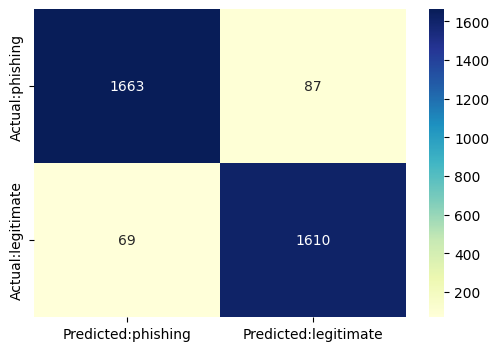

In [37]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:phishing', 'Predicted:legitimate'],
            index = ['Actual:phishing', 'Actual:legitimate'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['phishing','legitimate']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

**The ROC curve is used to get a visual representation of model performance across all thresholds**

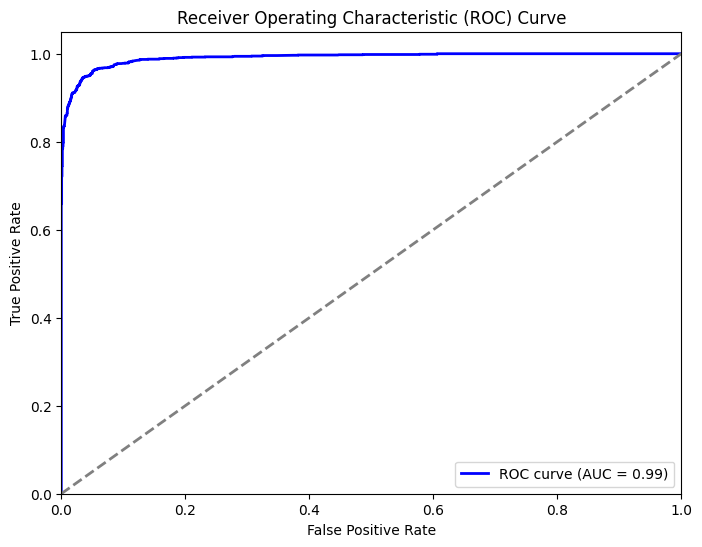

In [39]:
# Get the predicted probabilities for the positive class
from sklearn.metrics import roc_curve, auc
y_prob = lr.predict_proba(testX)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(testY, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()